In [1]:
from numbers import Complex
from collections import namedtuple
import cmath
import sympy
from matplotlib import pyplot, cm, colors
import numpy
from numpy import e, pi

In [2]:
# set up some basic data to run on
bounds = 5
re,im = numpy.mgrid[-bounds:bounds:100j, -bounds:bounds:100j]
z = re + 1j*im
theta = numpy.angle(z)
r = numpy.abs(z)

In [3]:
# set up some default values
ANGLE_COLORS = 'twilight_shifted_r'
ABS_COLORS = [[0.5]*3 + [0.5]]
EXP_LEVELS = (
    list(range(1, 10))
    + [
        exponent * mantissa
        for exponent in (10**n for n in range(1, 10))
        for mantissa in [1, 2, 3, 5, 7, 9] # get tighter towards 10, but not too quickly
        #for mantissa in [1.0, 1.5, 2.2, 3.3, 4.7, 6.8] # E6 series
    ]
)

In [4]:
class ComplexFunction(object):
    def __init__(self, name, data, angle_colors=ANGLE_COLORS, abs_colors=ABS_COLORS):
        self.name = name
        self.data = data
        self.angle_colors = angle_colors
        self.abs_colors = abs_colors
        self.show_colorbar = False
    
    def paint(self, ax):
        ax.set_title(self.name)
        ax.set_xlabel(r'$\operatorname{Re}$ $z$')
        ax.set_ylabel(r'$\operatorname{Im}$ $z$')
        
        # shade by angle:
        shade_angle = ax.pcolormesh(
            re, im,
            numpy.angle(self.data),
            cmap=self.angle_colors,
            vmin=-pi, vmax=pi,
            shading='gouraud',
        )
        
        # contour by magnitude:
        contour_magnitude = ax.contour(
            re, im,
            numpy.abs(self.data),
            colors=self.abs_colors,
            levels=EXP_LEVELS,
        )
        
        # draw the real line:
        contour_real = ax.contour(
            re, im,
            numpy.angle(self.data),
            colors=self.abs_colors,
            levels=[0],
        )
        
        # size to fit data
        ax.axis('scaled')
    
    def __str__(self):
        return repr(self)
    def __repr__(self):
        return f'ComplexFunction(\'{self.name}\')'
        
    
    
z_func = ComplexFunction('z', z)
z_func

ComplexFunction('z')

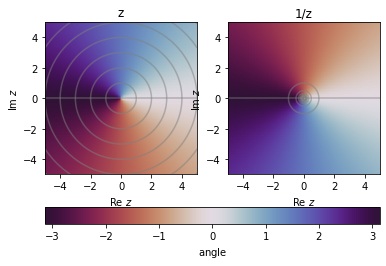

In [5]:
def compare_funcs(*funcs):
    row_max = 3
    ncols = min(len(funcs),row_max)
    nrows = ((len(funcs)-1)//row_max)+1
    fig, axs = pyplot.subplots(nrows=nrows, ncols=ncols)
    if ncols < 2:
        axs = [axs]
    elif nrows > 1:
        axs = [ax for row in axs for ax in row]

    for func, ax in zip(funcs, axs):
        func.paint(ax)
        
    cb = pyplot.colorbar(
        cm.ScalarMappable(
            norm=colors.Normalize(vmin=-pi, vmax=pi),
            cmap=ANGLE_COLORS,
        ),
        ax=fig.axes,
        orientation='horizontal'
    )
    cb.set_label(r'$\operatorname{angle}$')
    
    
    #fig.tight_layout()
    return fig
    
fig = compare_funcs(z_func, ComplexFunction('1/z', 1/z))

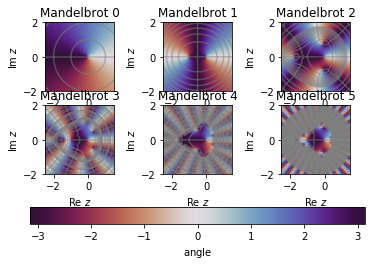

In [6]:
def mand(z, n):
    if n<=0:
        return z
    else:
        return mand(z, n-1)**2 + z

figure = compare_funcs(*(
    ComplexFunction(f'Mandelbrot {n}', mand(z, n))
    for n in range(6)
))
for axes in figure.get_axes()[:6]:
    axes.set_ylim(-2, 2)
    axes.set_xlim(-2.5, 1.5)

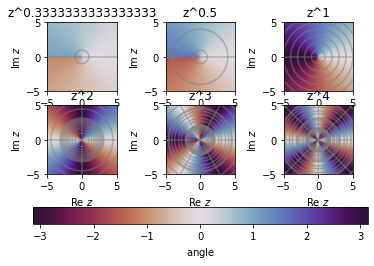

In [7]:
fig = compare_funcs(*(
    ComplexFunction(f'z^{a}', z**a)
    for a in [1/3, 1/2, 1, 2, 3, 4]
))

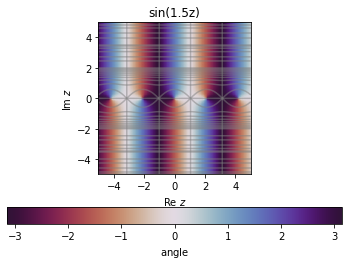

In [8]:
factor = 1.5
fig = compare_funcs(
    ComplexFunction(f'sin({factor}z)', numpy.sin(factor*z)),
)

(-2.5, 2.5)

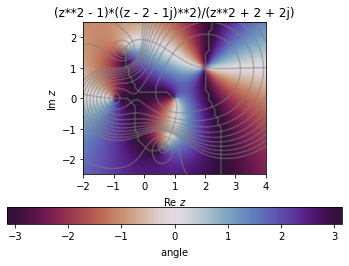

In [9]:
# page example from https://en.m.wikipedia.org/wiki/Domain_coloring
fig = compare_funcs(
    ComplexFunction(
        '(z**2 - 1)*((z - 2 - 1j)**2)/(z**2 + 2 + 2j)',
        ((z**2 - 1)*((z - 2 - 1j)**2)/(z**2 + 2 + 2j)),
    )
)
axes = fig.get_axes()[0]
axes.set_xlim(-2, 4)
axes.set_ylim(-2.5, 2.5)

(-2.5, 2.5)

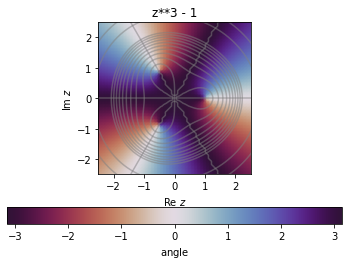

In [10]:
fig = compare_funcs(ComplexFunction(
    'z**3 - 1',
    z**3 - 1,
))
span = 5
fig.axes[0].set_xlim(-span/2, span/2)
fig.axes[0].set_ylim(-span/2, span/2)